# Baseball Case Study

###### Batch - DS0422
###### Submitted by - Akash Shrivastava
***

#### Problem Statement:

###### This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

###### - Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

###### - Output: Number of predicted wins (W)

###### To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

###### For downloading the dataset, use the link given below. 

###### Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv
***

- **Importing required libraries**

In [5]:
import numpy as np  #---- for computation
import pandas as pd #---- for dataframe dependencies

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# for stats
from scipy import stats

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
# importing casestudy dataset (.csv file)
df=pd.read_csv('baseball.csv')

In [8]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [9]:
print('No. Of Rows -',df.shape[0])
print('No. Of Columns -',df.shape[1])

No. Of Rows - 30
No. Of Columns - 17


In [10]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


###### Comment : 
**This dataset contains 16 input features which contains statistical summary of the baseball players and the 'W'(wins) is the target variable which predicts the number of wins.**

###### Input and Output Features : 

- **Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors**

- **Output: Number of predicted wins (W)**

In [11]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

**In order to gain complete understanding of the dataset , we need to replace abbrevations to its terminology and to understand column meaning refered baseball statistic webpage(https://en.wikipedia.org/wiki/Baseball_statistics) for complete readibility and enhancing interpretation.**

In [16]:
df.rename(columns = {'W' : 'Wins',
                   'R' : 'Runs_Scored',
                 'AB' : 'At_Bat',
                  'H' : 'Hits',
                  '2B' : 'Doubles',
                  '3B' : 'Triples',
                  'HR' : 'Home_Runs',
                  'BB' : 'Base_on_Balls',
                  'SO' : 'Strike_outs',
                  'SB' : 'Stolen_base',
                  'RA' : 'Runs_Average',
                  'ER' : 'Earned_runs',
                  'ERA' : 'Earned_Run_Average',
                  'CG' : 'Complete_Game',
                  'SHO' : 'Shut_Outs',
                  'SV' : 'Saves',
                  'E' : 'Errors'},
          inplace=True)

In [17]:
df.head()

,Wins,Runs_Scored,At_Bat,Hits,Doubles,Triples,Home_Runs,Base_on_Balls,Strike_outs,Stolen_base,Runs_Average,Earned_runs,Earned_Run_Average,Complete_Game,Shut_Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs_Scored         30 non-null     int64  
 2   At_Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home_Runs           30 non-null     int64  
 7   Base_on_Balls       30 non-null     int64  
 8   Strike_outs         30 non-null     int64  
 9   Stolen_base         30 non-null     int64  
 10  Runs_Average        30 non-null     int64  
 11  Earned_runs         30 non-null     int64  
 12  Earned_Run_Average  30 non-null     float64
 13  Complete_Game       30 non-null     int64  
 14  Shut_Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

###### Comment : 
- **We can observe that all of the features in this dataset are numerical and has no categorical column.**
- **Just one feature i.e ERA is in float as it is in ratio type feature and rest all the features are in int type.**
- **This dataset fall into regression analysis.**

###### Objective : 
**Devevlop an ML Regression based algorithm which predicts the Number of wins of a team based on features.**
**wins is target variable and others are input features.**

## Statistical Analysis

<AxesSubplot:>

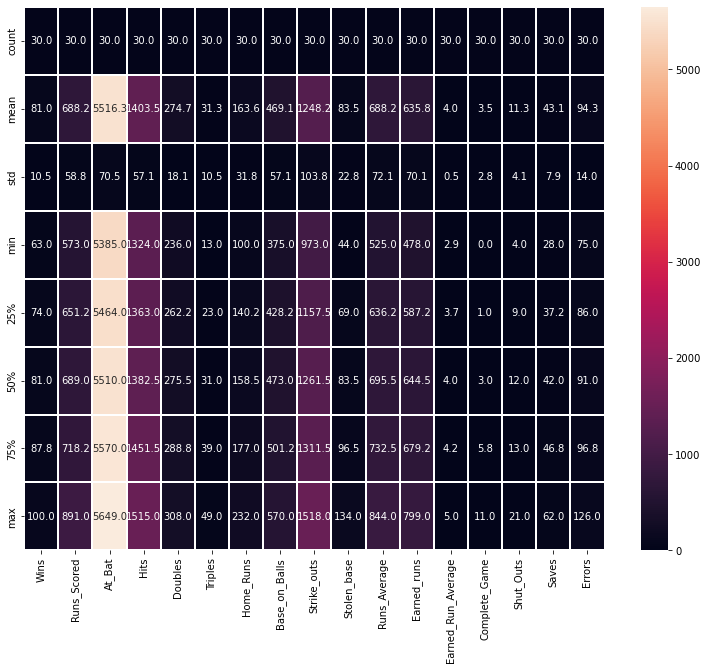

In [24]:
#visualization using heatmap
plt.figure(figsize=(13,10))
sns.heatmap(df.describe(),linewidths = 0.1, fmt= '0.1f',annot = True)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs_Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At_Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home_Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base_on_Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike_outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen_base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


###### Comment : 
- **Count is same for each variable.**
- **If we observe that at mean and 50% columns for different feature we can see data ins slightly right skewed for most os features.**
- **75% and max values for columns i.e, Errors,Shutout,Run_scored shows presence of posible outliers.**
- **Overall all statistical parameter ffrom mean to max, shows indication features are progressing in a definite manner showing no visibe abnormlities.**
- **Heatmap clearly shows data need to sccale while building ML model.**

### Missing value check

<AxesSubplot:>

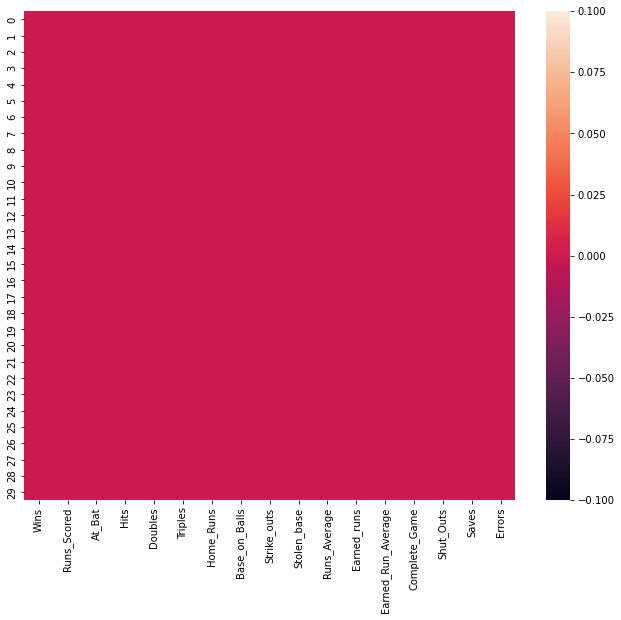

In [26]:
plt.figure(figsize=(11,9))
sns.heatmap(df.isnull())

In [27]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                    Missing Values  % Missing data
Wins                             0             0.0
Stolen_base                      0             0.0
Saves                            0             0.0
Shut_Outs                        0             0.0
Complete_Game                    0             0.0
Earned_Run_Average               0             0.0
Earned_runs                      0             0.0
Runs_Average                     0             0.0
Strike_outs                      0             0.0
Runs_Scored                      0             0.0
Base_on_Balls                    0             0.0
Home_Runs                        0             0.0
Triples                          0             0.0
Doubles                          0             0.0
Hits                             0             0.0
At_Bat                           0             0.0
Errors                           0             0.0


###### Comment : 
**There is no missing values/null values present in dataset.**

## EDA

#### Distribution of features

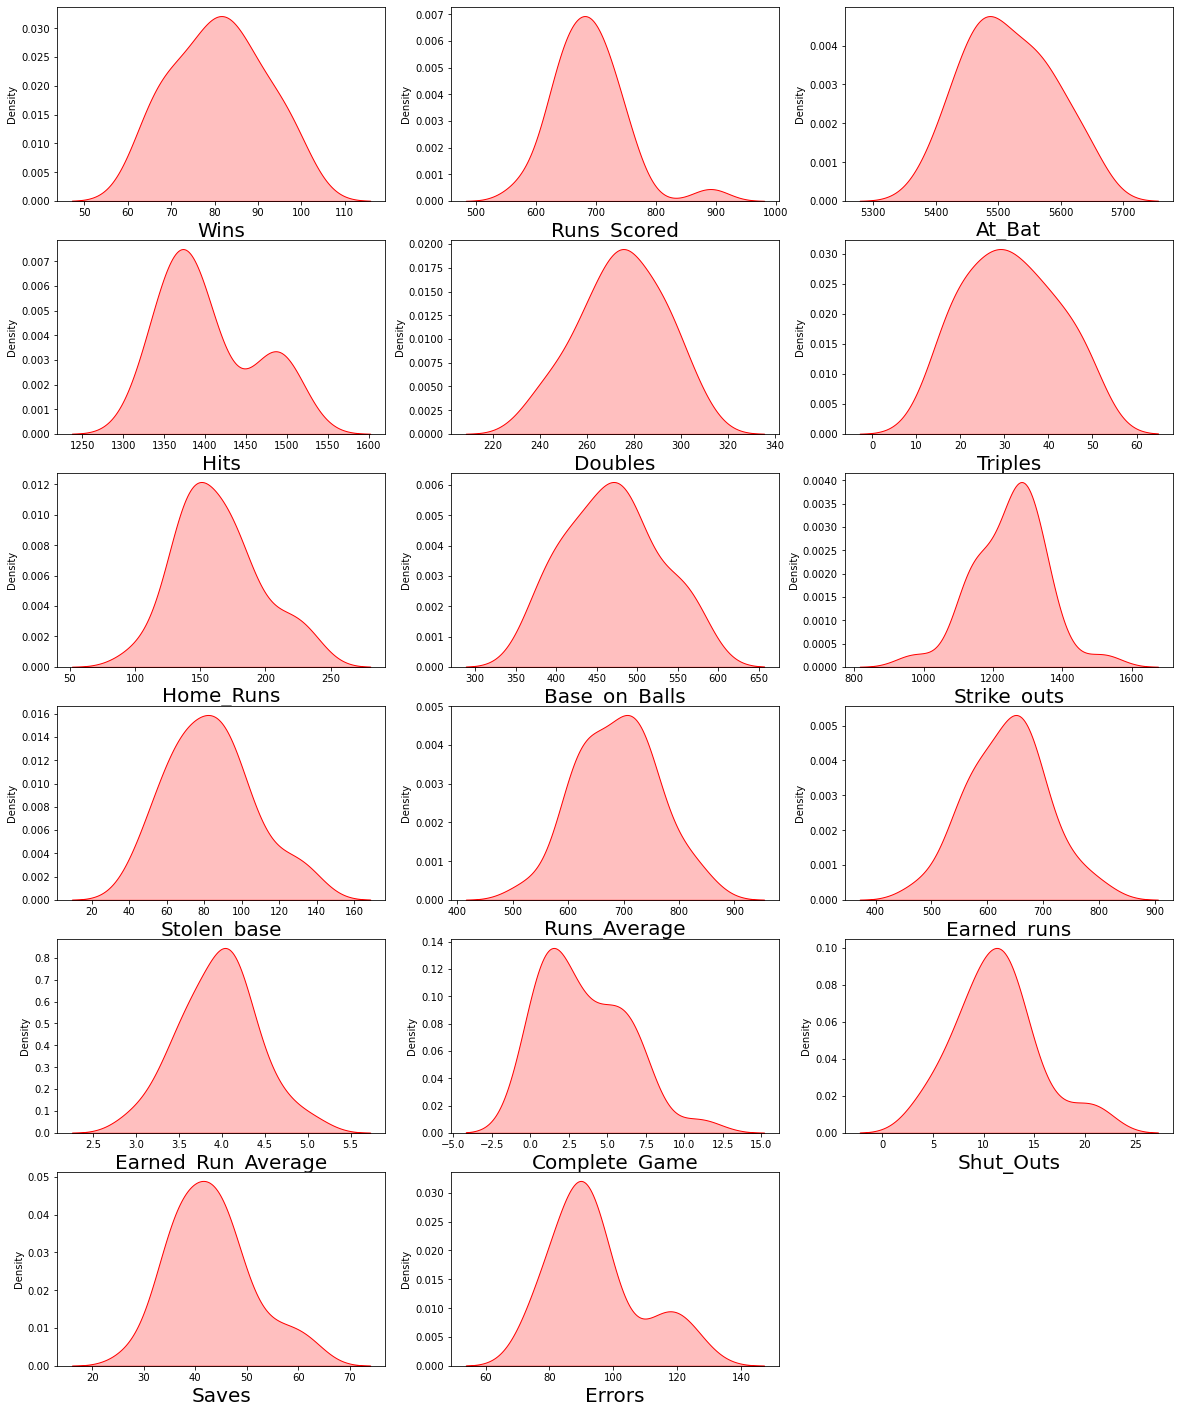

In [30]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column], color= 'r', hist= False,kde_kws={'shade':True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

###### Comment : 
**Clearly we can observe that some of the feature are either right skewed or left skewed.**

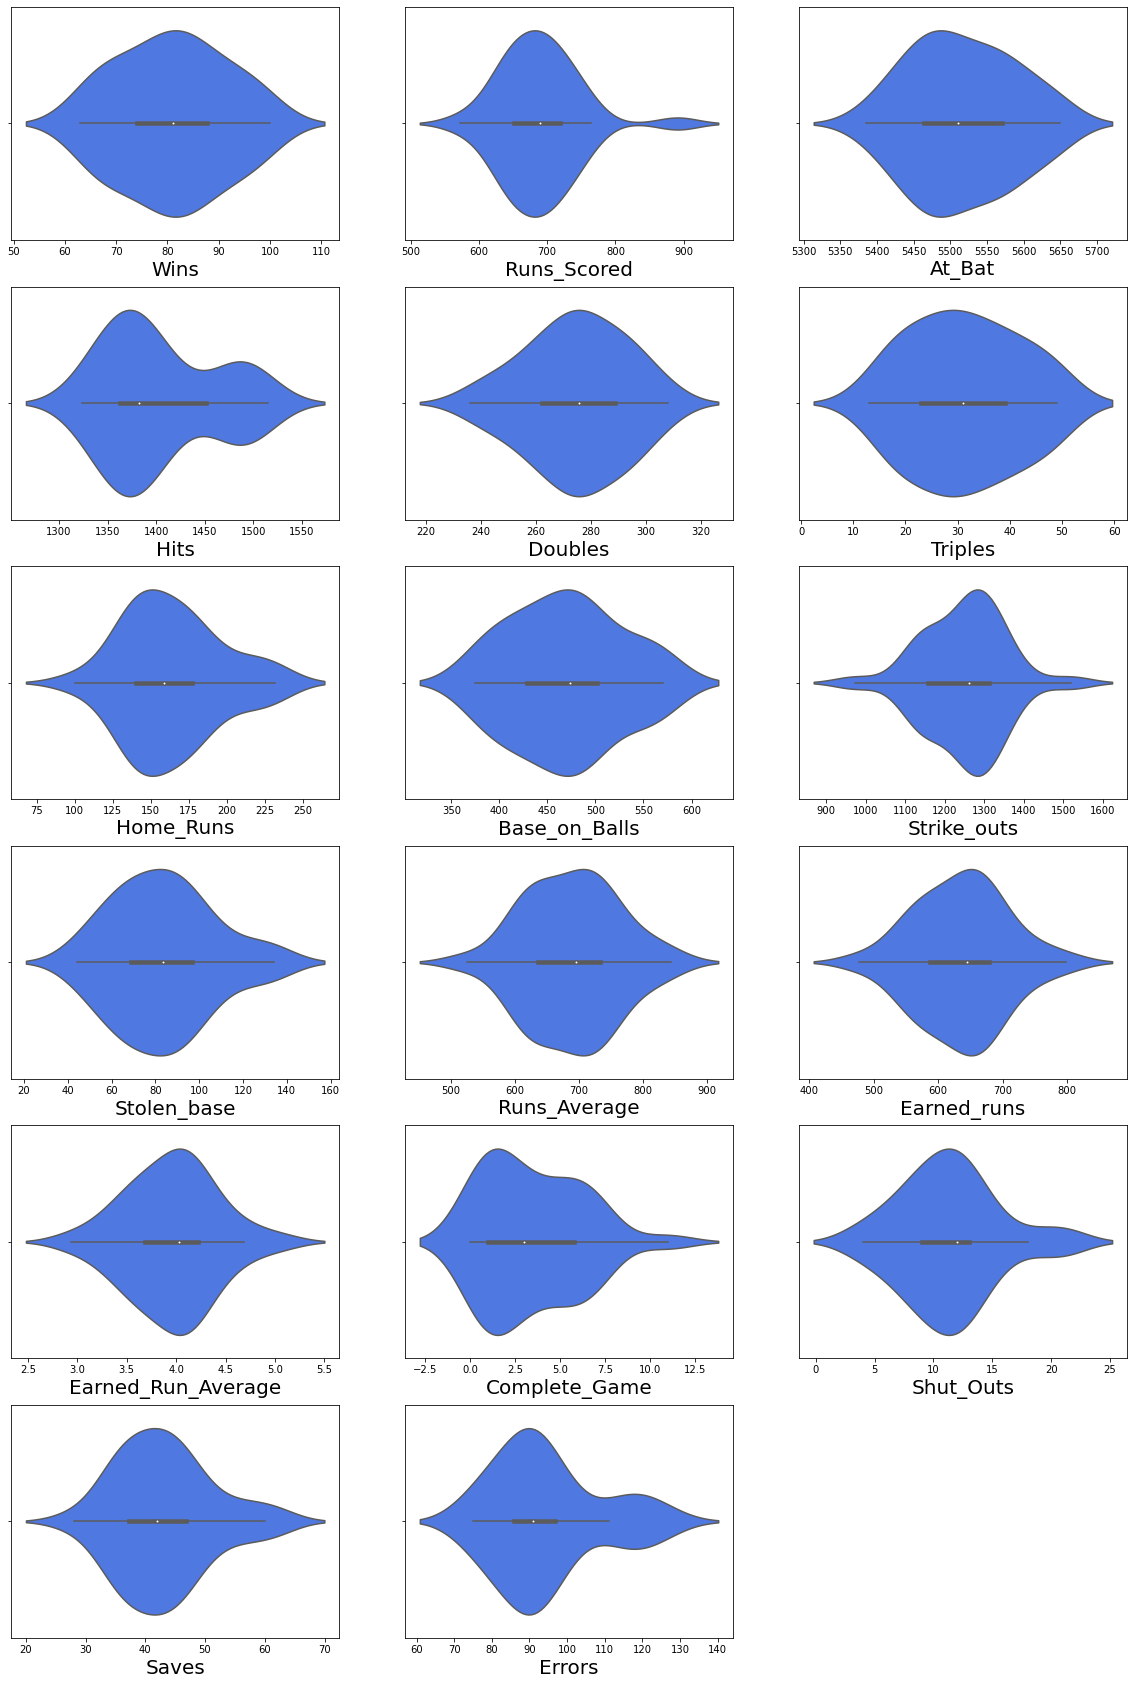

In [37]:
sns.set_palette('rainbow')
plt.figure(figsize=(20,30), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

###### Comment : 
1. **Shut outs and Complete Game occur very rarely now-a-days which we can definitely see in violinplot of these variable.**
2. **An Error does not count as a hit but still counts as an at bat for the batter, So need to dive into how much Error are contributing to at bat.**
3. **Most of the saves are between 30 & 50. Saves does not entitle pitcher as winning pitcher but still it brings wins for team.It will be interesting what relation wins and saves held or how much saves contribute in win.**
4. **Run average, Earned run and Earned run average are important for pitcher statistics. We can see there is not much difference in the plot of Earned run and Run Average, so from here we can conclude that Unearned Run does not make much difference in wins.**
5. **Homeruns (125 to 175 peak) are more than triples (20 to 40 majority) so most of the good shots by battar directly convert into home runs.**
6. **As we know pitchers try to keep the Earned run Average low which eventually leads to wins. Here for most of the game ERA is around 3.5-4.5.**
7. **Let consider violinplot of doubles and base on balls. We know that if pitcher pitched ball for consecutive 4 ball then Base is awarded to batter. Clearly More runs comes from base of ball than doubles.**

**Lets us now Investigate Runs and Hits together and also get clarity how baseball team can win a match over Runs vs Hits.**

**How do u win baseball ?**

*To win in baseball, you must reach the end of the game with more runs than your opponent. If you have the same amount of runs, you will go into another inning until one team has more runs at the end of the inning.*

**Runs Vs Hits**
- *Runs (R) - The number of runs scored by that player, by reaching home base in any manner.*
- *Hits (H) - The number of base hits made by that player, not including reaching base on an error or on a "fielder's choice".*

**Based on the above observations we will give insights on how many hits converted into Runs which lead baseball team to win through multivariate analysis.**

Text(0, 0.5, 'Runs_Scored')

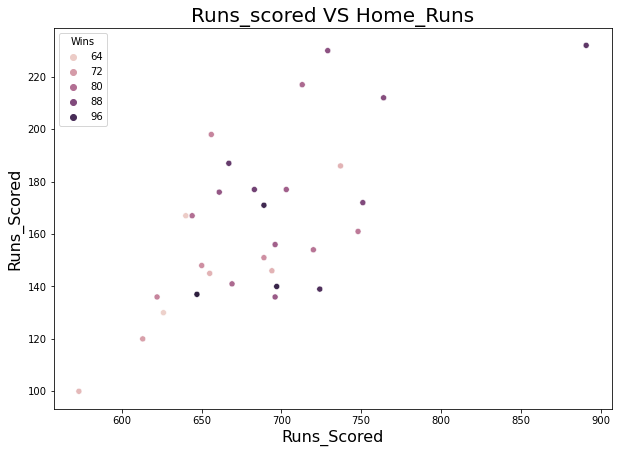

In [40]:
#checking relations between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,7])
plt.title("Runs_scored VS Home_Runs",fontsize = 20)
sns.scatterplot(df['Runs_Scored'], df['Home_Runs'],hue=df['Wins'])
plt.xlabel('Runs_Scored',fontsize =16)
plt.ylabel('Runs_Scored',fontsize =16)

###### Comment : 
1. **Home runs in ranges between 140-180 with Runs scored in between 650-750 which lad baseball team to win more than over 90 matches for the team.Therefore Home runs plays an vital role for winning and increases the possibility of wins.**
2. **But possibility of winning a game is always 1/2 , good performance of a single can change the chances of winning.**

###### Conclusion : Home runs regarlessly contributes in winning of the baseball team but not everything to give 100% winning chances.

Text(0, 0.5, 'At_Bat')

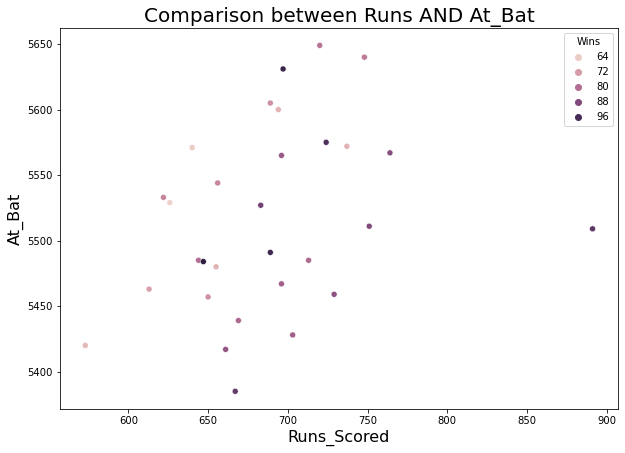

In [41]:
#checking relations between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,7])
plt.title("Comparison between Runs AND At_Bat",fontsize = 20)
sns.scatterplot(df['Runs_Scored'], df['At_Bat'],hue=df['Wins'])
plt.xlabel('Runs_Scored',fontsize =16)
plt.ylabel('At_Bat',fontsize =16)

######  Comment :
- **There is no bench mark range for At_Bats. It is doubtful as how much At_Bats matter to winning Statistics.**
- **We get positive linear relationship which means more AT_Bats more runs will be scored.**

Text(0, 0.5, 'Strike_outs')

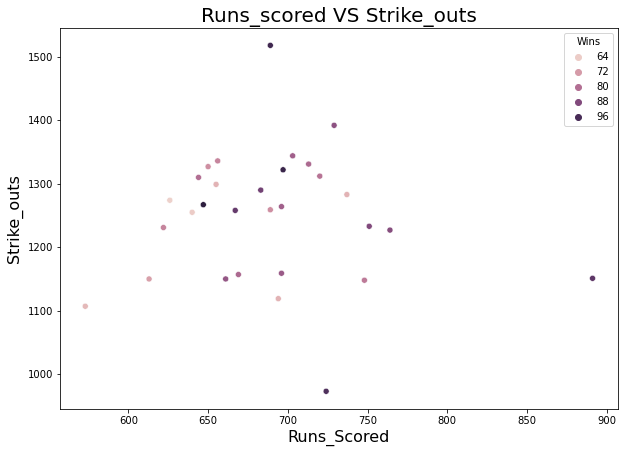

In [43]:
#checking relations between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,7])
plt.title("Runs_scored VS Strike_outs",fontsize = 20)
sns.scatterplot(df['Runs_Scored'], df['Strike_outs'],hue=df['Wins'])
plt.xlabel('Runs_Scored',fontsize =16)
plt.ylabel('Strike_outs',fontsize =16)

###### Comment : 
- **Strike_outs means that batter at strike is out and striking out is another most important thing in a game to win.**
- **Striking out opponent below 700 will ensure winning.**

Text(0, 0.5, 'Earned_Run_Average')

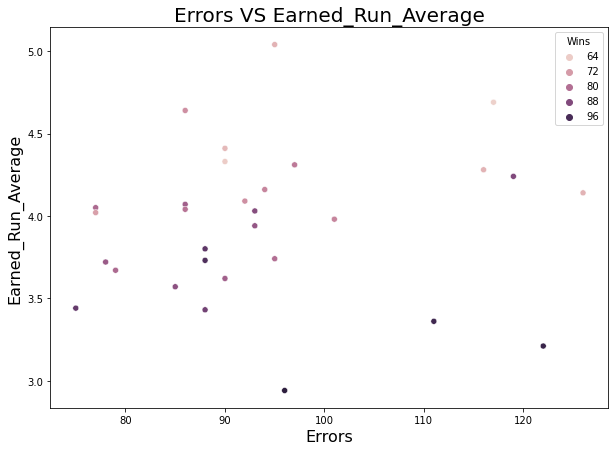

In [44]:
#checking relations between two variables
sns.set_palette('hsv')
plt.figure(figsize=[10,7])
plt.title("Errors VS Earned_Run_Average",fontsize = 20)
sns.scatterplot(df['Errors'], df['Earned_Run_Average'],hue=df['Wins'], cmap=('Spectral'))
plt.xlabel('Errors',fontsize =16)
plt.ylabel('Earned_Run_Average',fontsize =16)

###### Comments : 
- **We can observe that from the above scatterplot i.e Minimum error means we can win Maximum game. Keeping it below 90 we can win maximum game i.e we can hld it as a benchmark.**
- **keeping ERA below 3.5 as much as low as pitcher ensures win. By low ERA pitcher saves more run for his team .**

Text(0, 0.5, 'Earned_Run_Average')

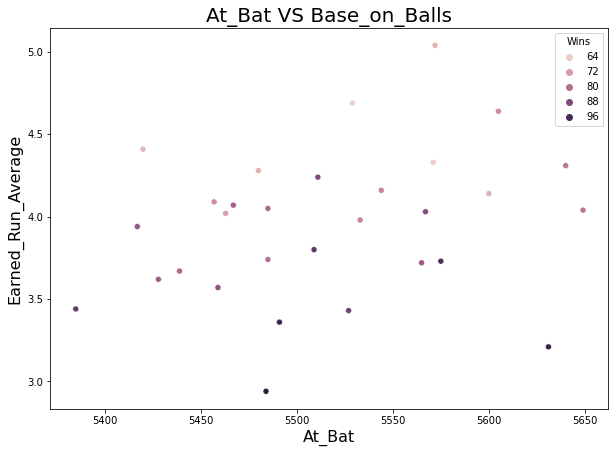

In [45]:
#checking relations between two variables
sns.set_palette('hsv')
plt.figure(figsize=[10,7])
plt.title("At_Bat VS Base_on_Balls",fontsize = 20)
sns.scatterplot(df['At_Bat'], df['Earned_Run_Average'],hue=df['Wins'], cmap=('Spectral'))
plt.xlabel('At_Bat',fontsize =16)
plt.ylabel('Earned_Run_Average',fontsize =16)

###### Comment : At_bat VS Base_on_balls does'nt give specific information.High ERA means high Errors which results against our objective i.e winning

### Boxplot of Features

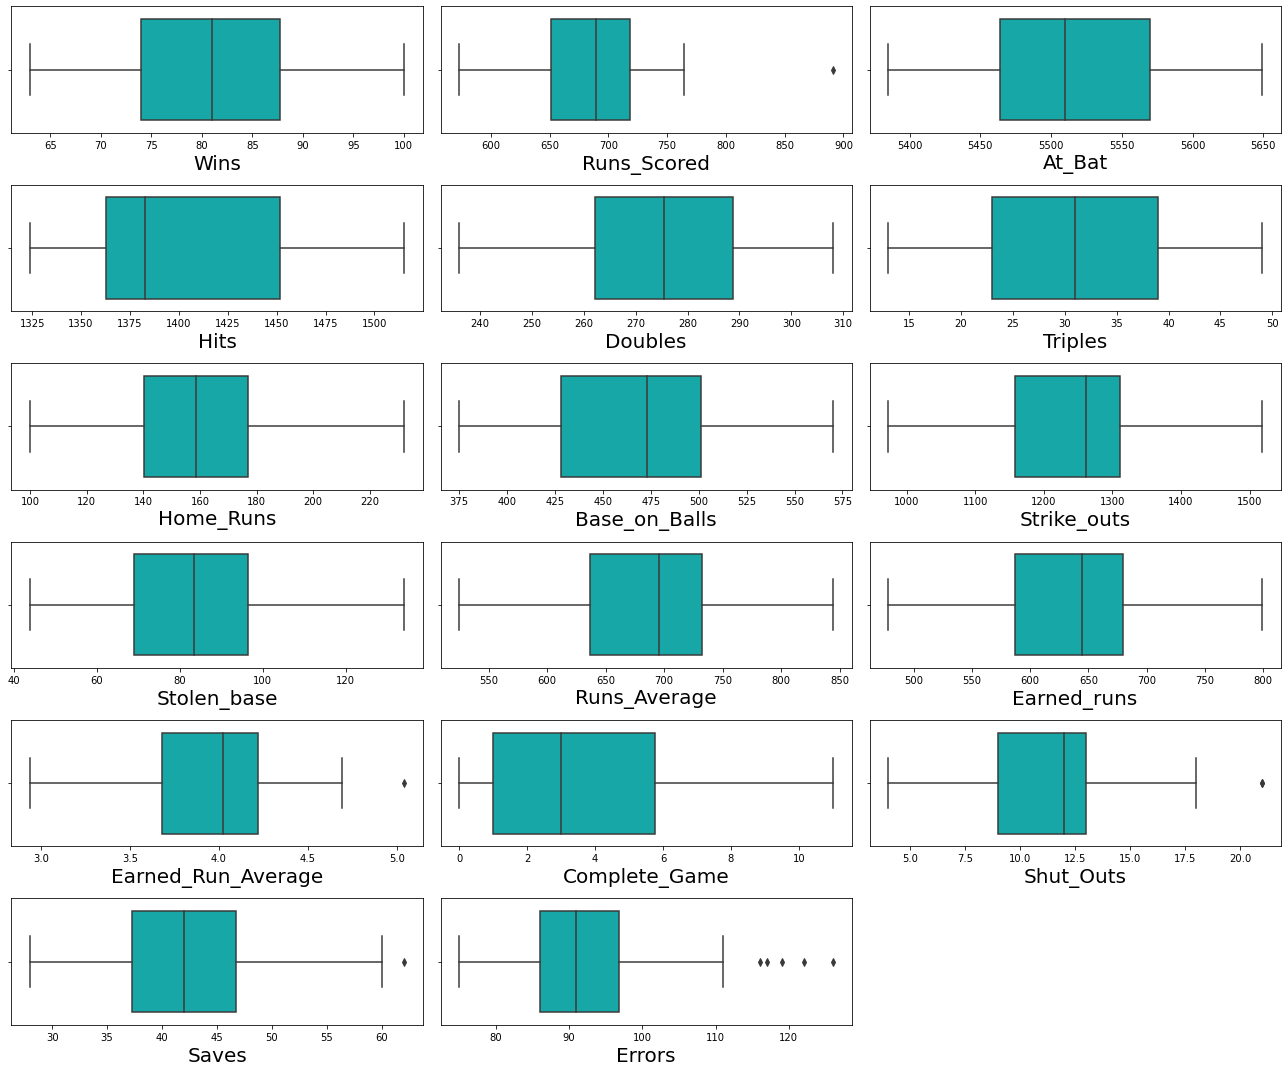

In [46]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column], color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

###### Comment : 
- **There are some outliers present in data. As data is based on real baseball event 2014, these outliers are valid data points.**
- **Run_scored has one outlier but runs is most important parameter for our objective, so we will remove corresponding outlier.**
- **Shutouts are rare but completely possible with extraordinary performances.**
- **Outliers in Errors is totally possible so we need to investigate it.**

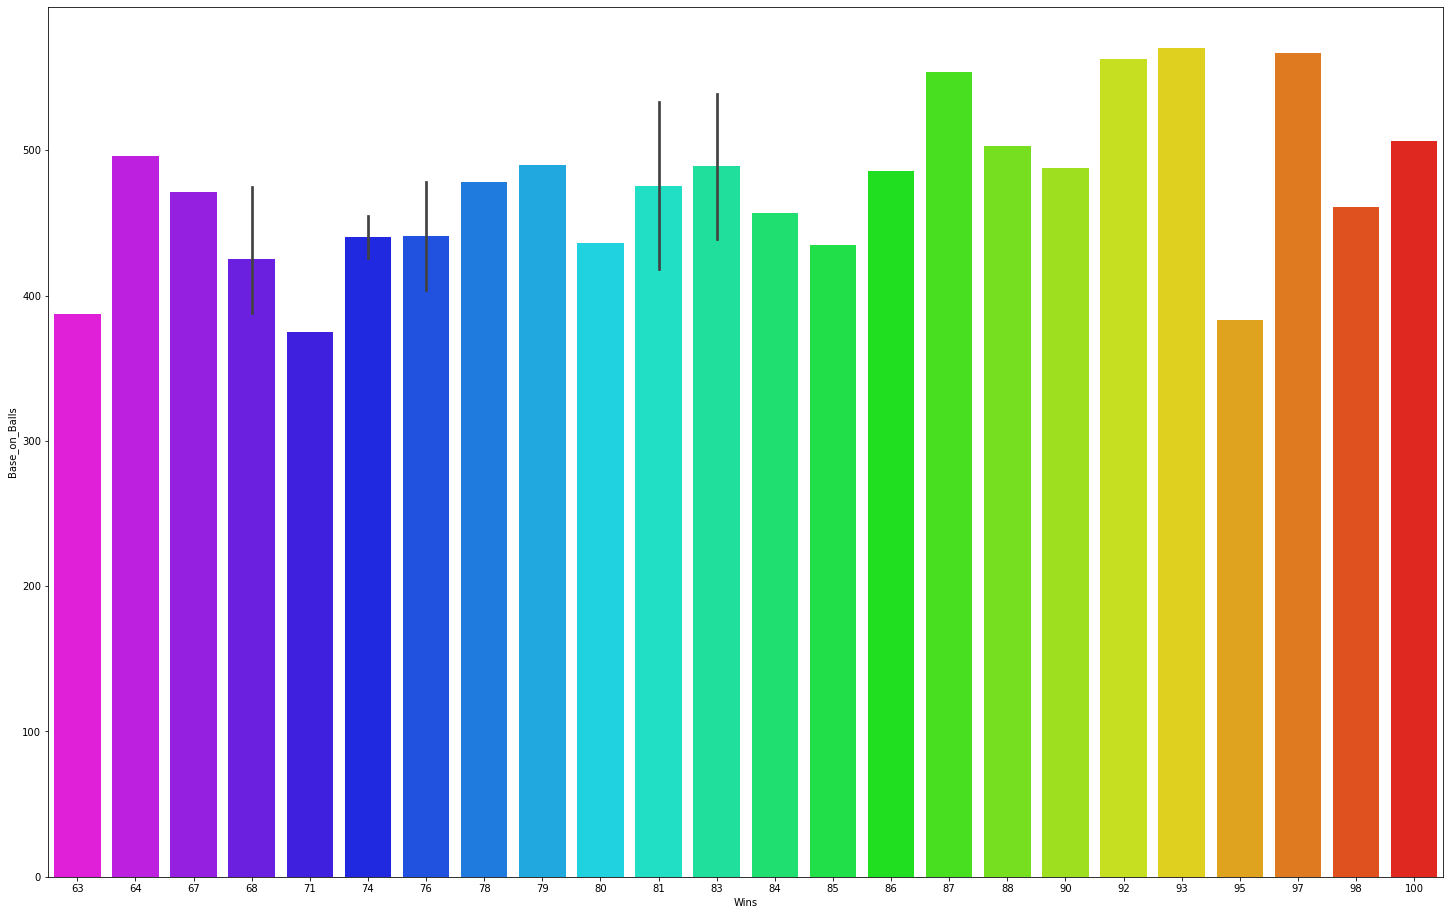

In [47]:
plt.figure(figsize=(25,16))
sns.barplot(x='Wins' ,y='Base_on_Balls', data=df ,palette='gist_rainbow_r')
plt.show()

###### Comment : 
- **Base_on_Balls ensure pitcher high performance for winning.**
- **Base_on_Balls above 400 contributes in winning of baseball team.**

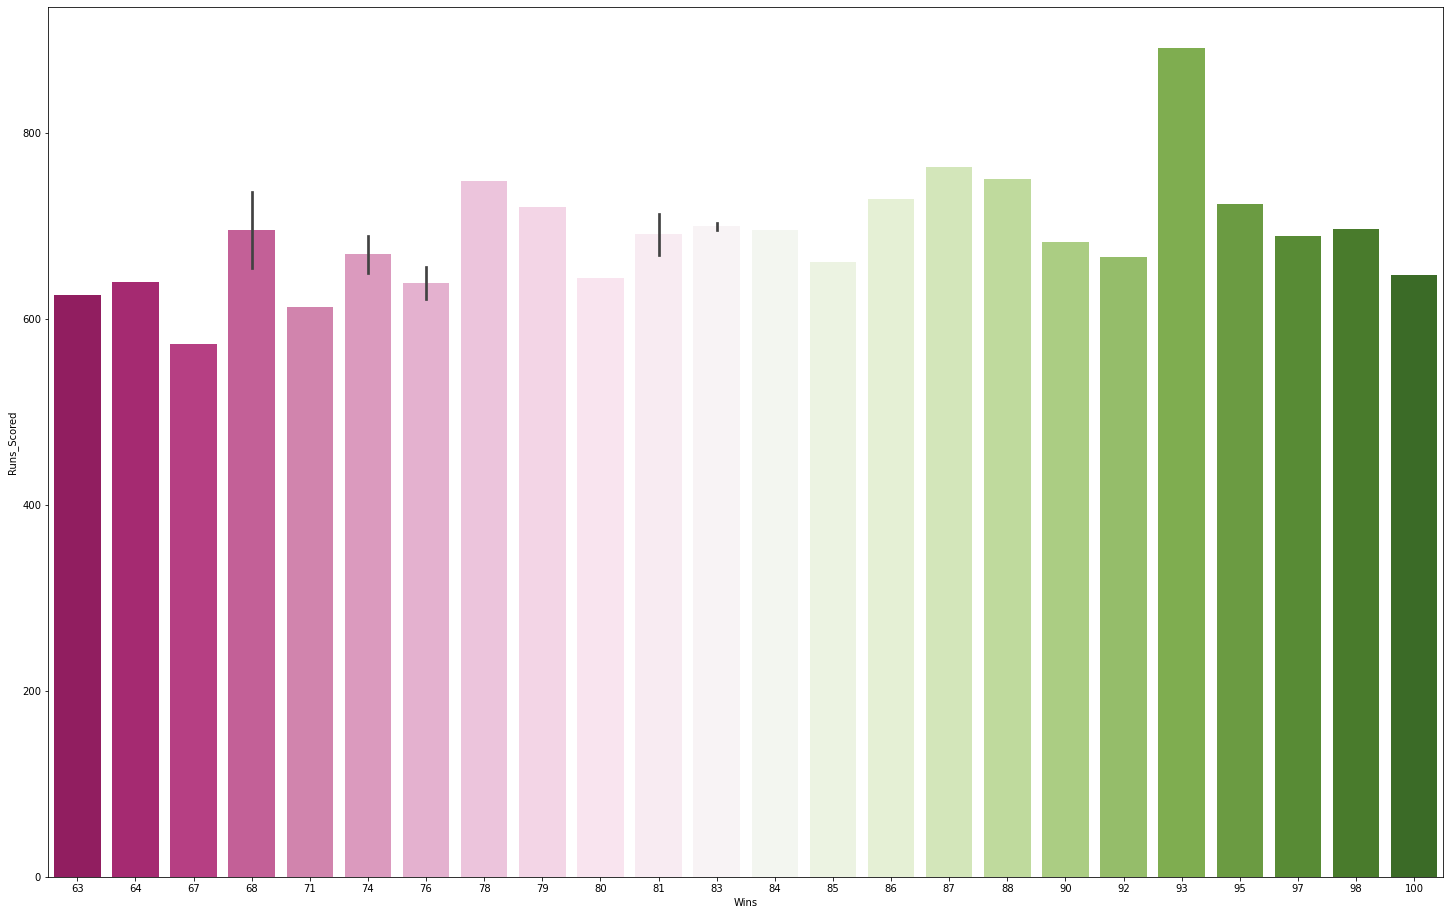

In [48]:
plt.figure(figsize=(25,16))
sns.barplot(x='Wins' ,y='Runs_Scored', data=df ,palette='PiYG')
plt.show()

###### Comment :  Runs_scored above 600 is benchmark for winning in any scenerio.

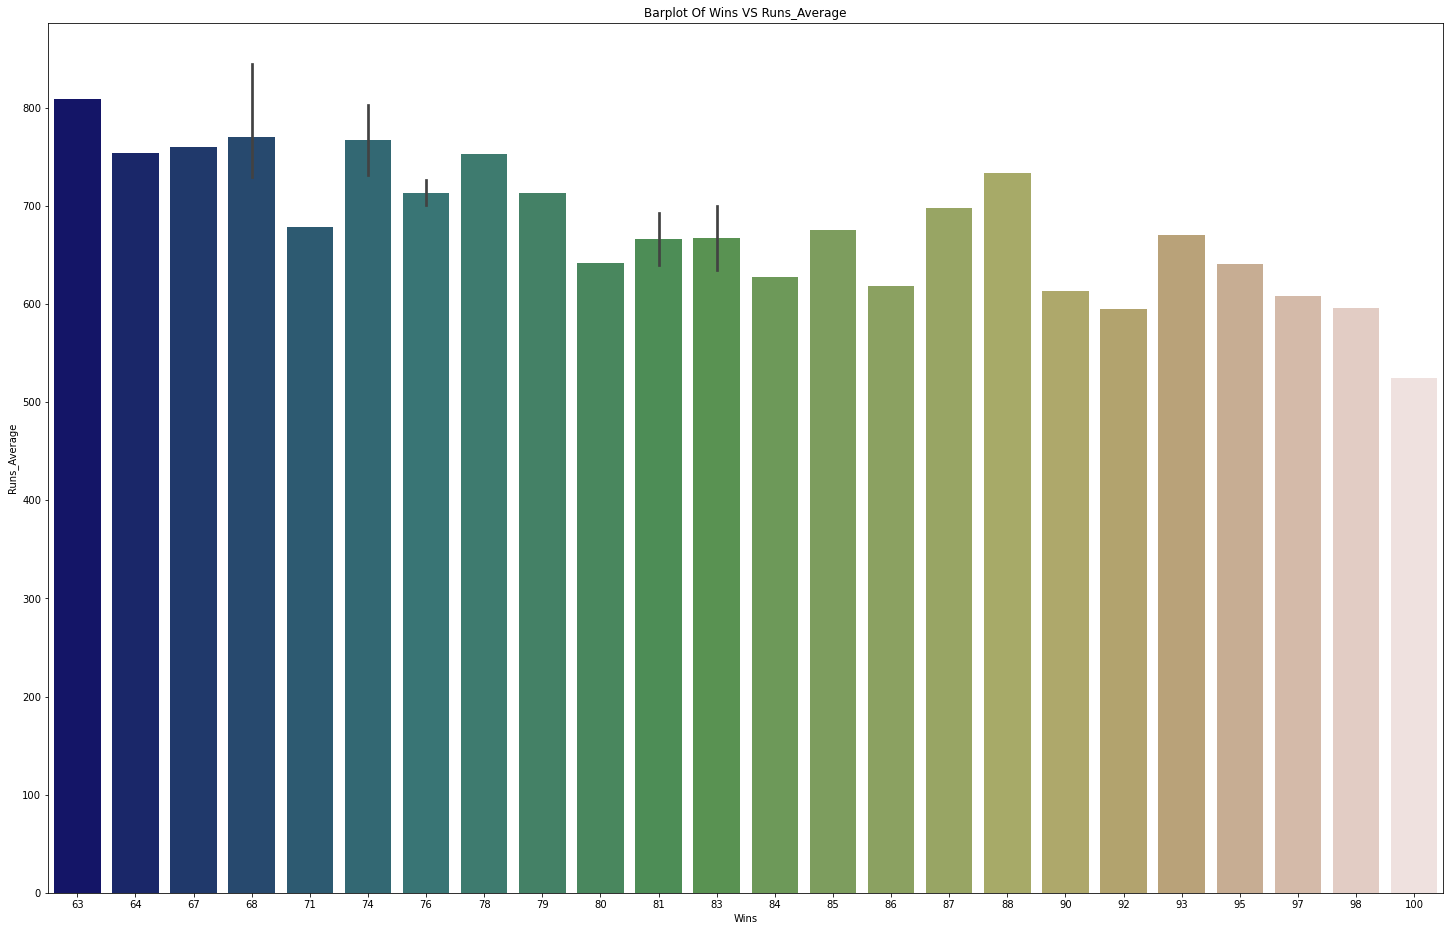

In [50]:
plt.figure(figsize=(25,16))
plt.title('Barplot Of Wins VS Runs_Average')
sns.barplot(x='Wins' ,y='Runs_Average', data=df ,palette='gist_earth')
plt.show()

###### Comment : 
- **We can observe that with increase in number of wins there is decrease in Runs_Average.But here question arises more runs means more winning.**
- **Increase in Runs _average gives advantage to hitter as wins are high at low run rate which clearly means winning probability also depends on pitcher performance. High pitcher performance increase number of winning ,  therefore we cann say that pitcher plays as important role as hitter.**
- **Pitcher statistical parameter like Strike_outs,Earned_Runs or ERA, is reflected on team performance.**

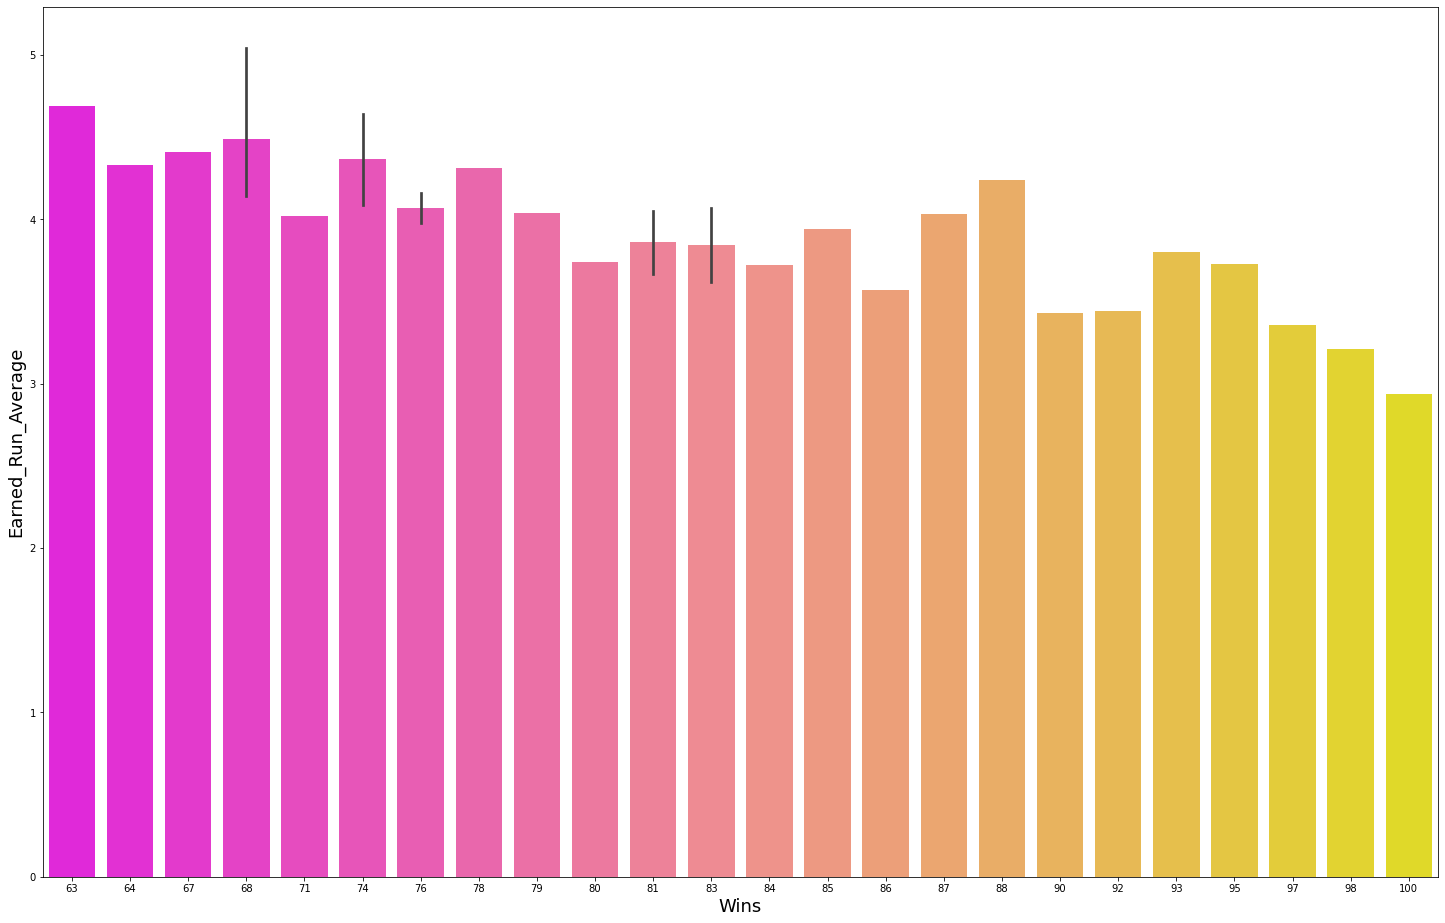

In [51]:
plt.figure(figsize=(25,16))
sns.barplot(x='Wins' ,y='Earned_Run_Average', data=df ,palette='spring')
plt.xlabel('Wins',fontsize = 18)
plt.ylabel('Earned_Run_Average',fontsize = 18)
plt.show()

###### Comment : From above observation we got what we thought i.e there must be atleat one pitcher parameter where this decreasing trend must be reflected.
- **ERA is low for maximum wins. Low ERA by picher specifically means that picher is giving less chance to batter to score good run for the team.**
- **In previous observations we concluded that keepping ERA as low as 3.5 and high pitchers performance ensures number of wins.**
- **ERA and Runs_Average score are in linear relationship(may be positive or negative).**
- **According to above observation Earned runs and Wins must have negative relationship.**

**Lets investigate through stripplot between Runs_Average and Earned_Run_Average.**

Text(0, 0.5, 'Earned_Run_Average')

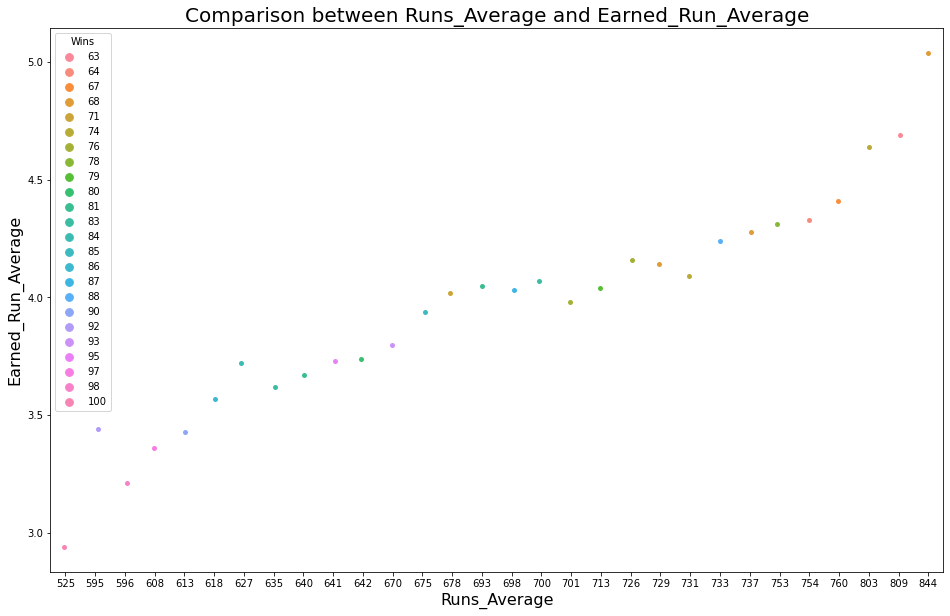

In [52]:
#checking relations between two variables
sns.set_palette('Set1')
plt.figure(figsize=[16,10])
plt.title("Comparison between Runs_Average and Earned_Run_Average",fontsize = 20)
sns.stripplot(df['Runs_Average'], df['Earned_Run_Average'],hue=df['Wins'], cmap=('Spectral'))
plt.xlabel('Runs_Average',fontsize =16)
plt.ylabel('Earned_Run_Average',fontsize =16)

###### Comment : ERA and RA hold linear relationship

**Now let us check strikeout for same behviour as ERA w.r.t Runs_Average.**

Text(0, 0.5, 'Strike_outs')

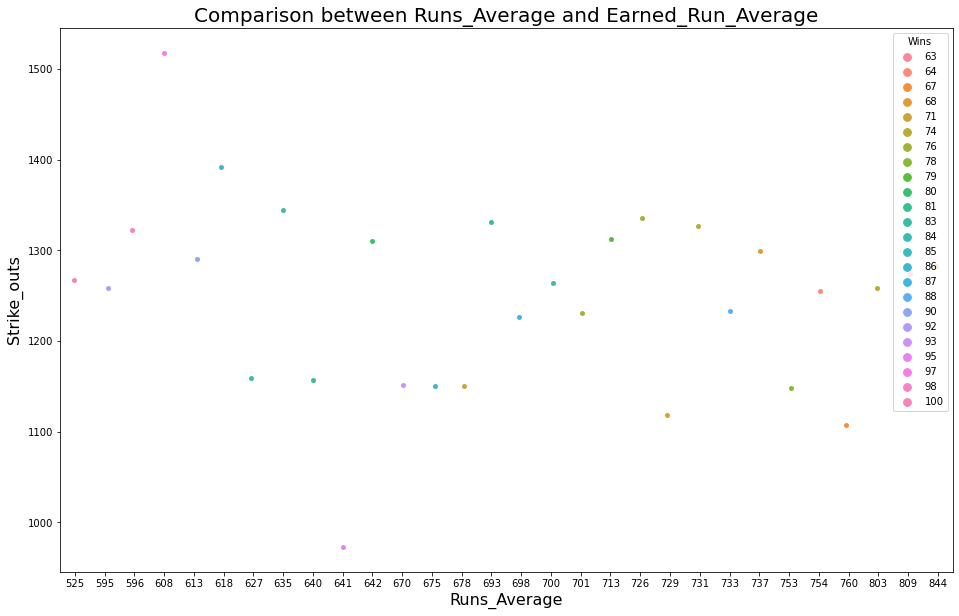

In [54]:
#checking relations between two variables
sns.set_palette('Set1')
plt.figure(figsize=[16,10])
plt.title("Comparison between Runs_Average and Earned_Run_Average",fontsize = 20)
sns.stripplot(df['Runs_Average'], df['Strike_outs'],hue=df['Wins'], cmap=('Spectral'))
plt.xlabel('Runs_Average',fontsize =16)
plt.ylabel('Strike_outs',fontsize =16)

###### Comment : from above observation strike outs significantly does'nt give much insights.

**Let's check one outlier in Runs_Scored.**

In [55]:
df['Runs_Scored'].max()

891

In [56]:
df.loc[df['Runs_Scored']==891]

,Wins,Runs_Scored,At_Bat,Hits,Doubles,Triples,Home_Runs,Base_on_Balls,Strike_outs,Stolen_base,Runs_Average,Earned_runs,Earned_Run_Average,Complete_Game,Shut_Outs,Saves,Errors
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.8,7,10,34,88


**Highest Doubles,HomeRuns and base on balls belongs to same datapoint. Let's cross check.**

In [58]:
df['Home_Runs'].max(),df['Base_on_Balls'].max(),df['Doubles'].max()

(232, 570, 308)

**In previous observation we observed that Earned Runs /Earned run average and wins have negative relationship,let us check by jointplot.** 

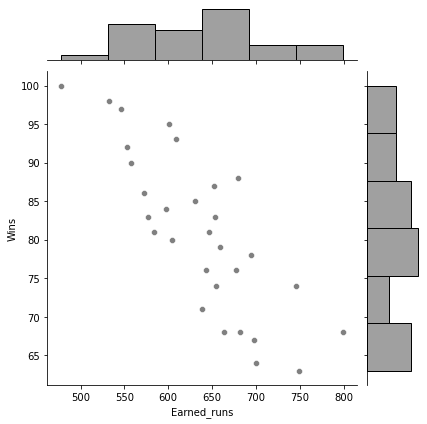

In [62]:
sns.jointplot(x='Earned_runs',y='Wins', data=df, color='grey', palette='Set1')

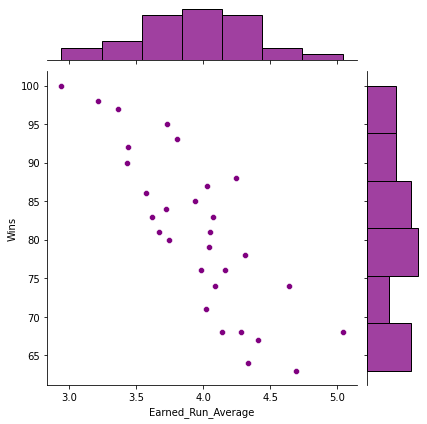

In [63]:
sns.jointplot(x='Earned_Run_Average',y='Wins', data=df, color='purple', palette='Set1')

###### Comment : Jointplot shows same observation as previous i.e Earned runs/Earned Run Average and wins having linear negative relationship.

**Lets us check relationship between saves and wins.**

<Figure size 720x720 with 0 Axes>

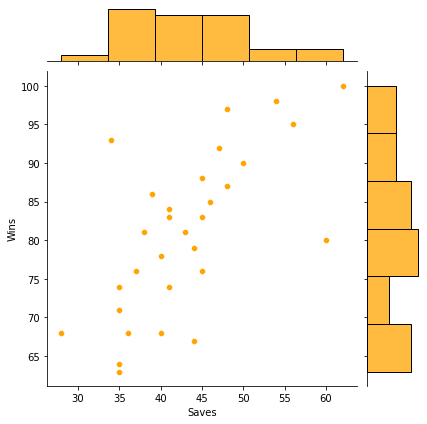

In [64]:
plt.figure(figsize=(10,10))
sns.jointplot(x='Saves',y='Wins', data=df, color='orange')

###### Comment :  Increase in number of saves there is increase in chances of wins.

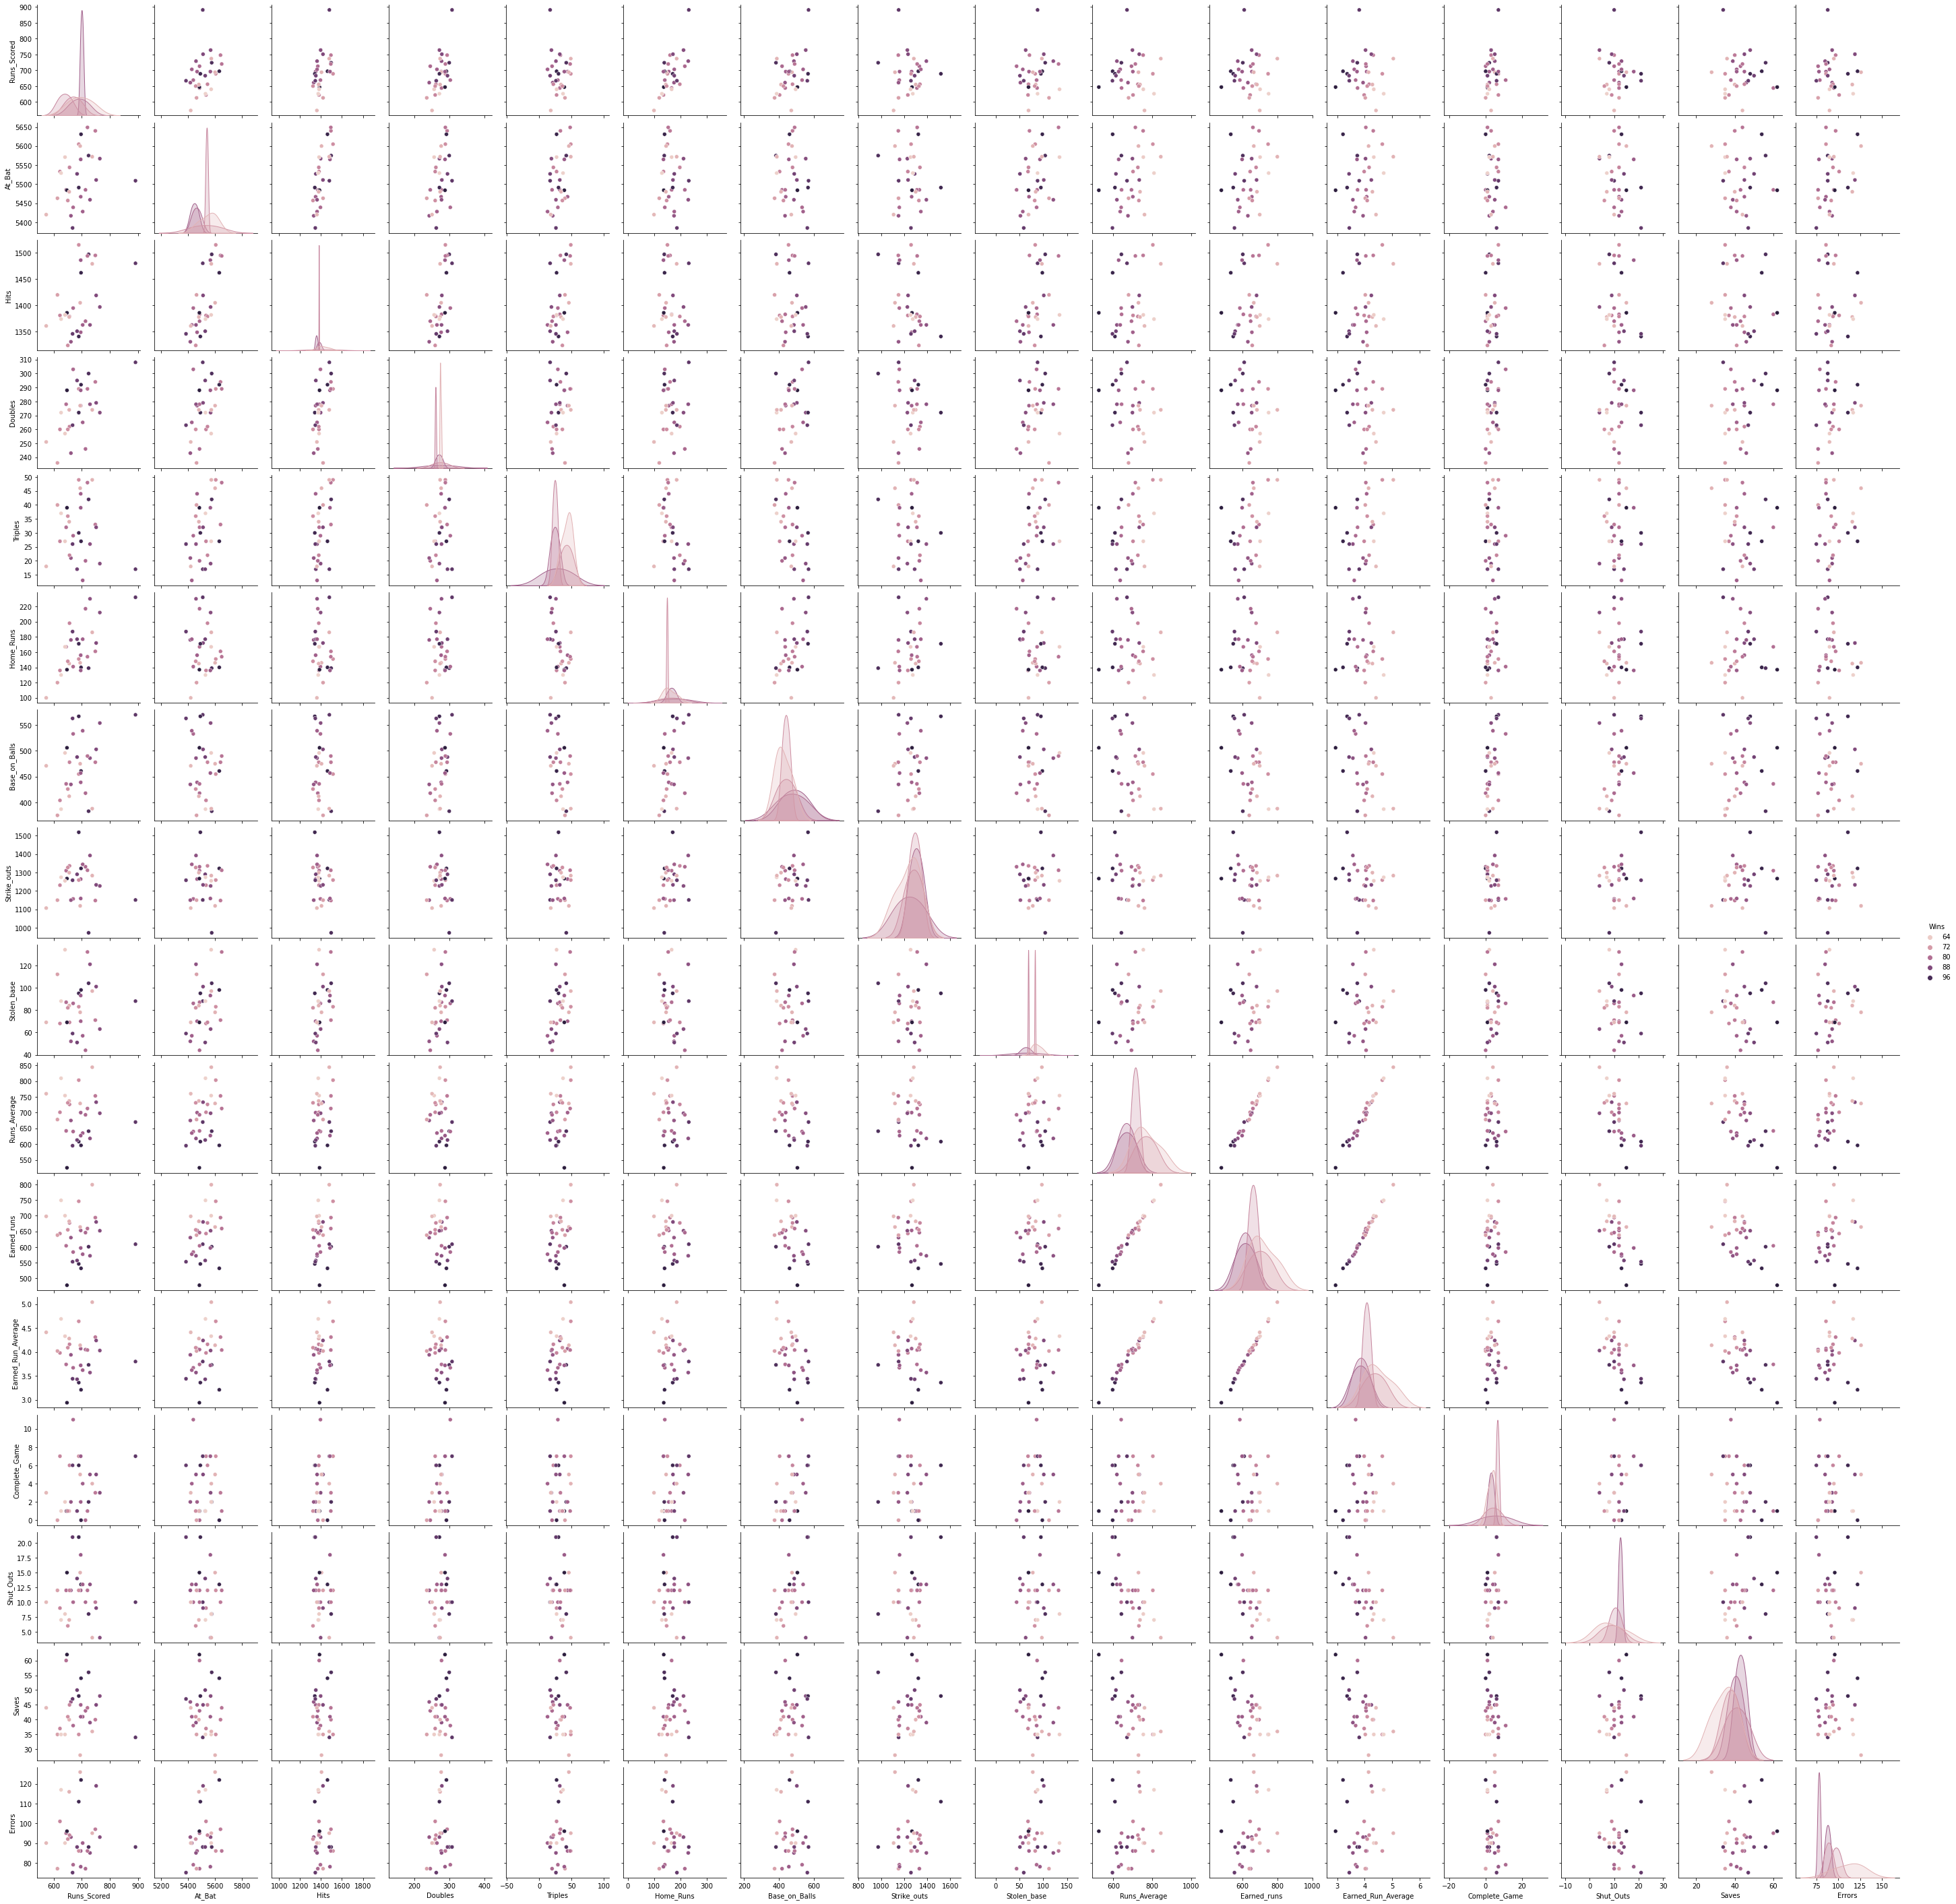

In [65]:
#pairplot of feature
sns.pairplot(df, hue='Wins')

###### Comment : 
- **Very high variance data**
- **We have to reduce data to obtain the variance of the model**

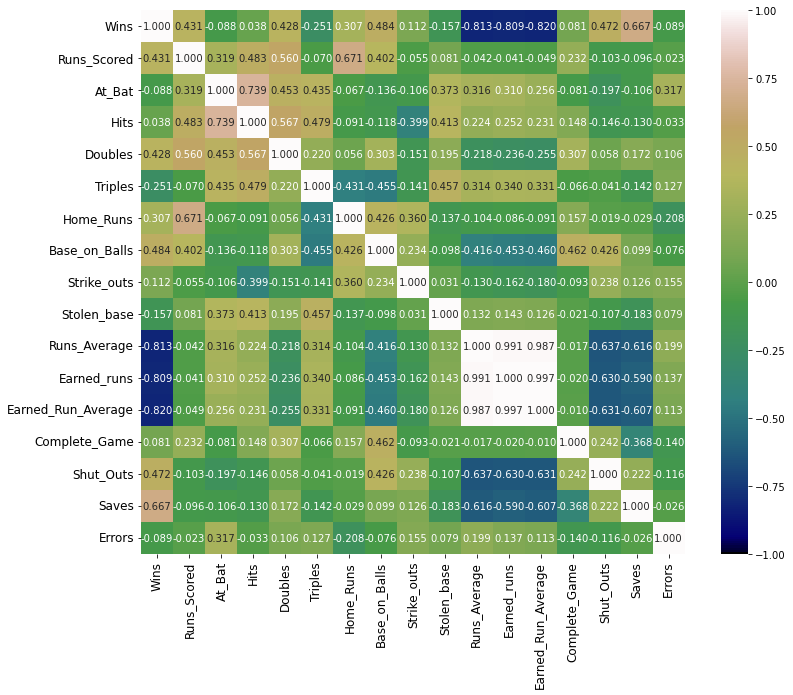

In [68]:
# plotting correlation
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,square=True, fmt='0.3f', annot_kws={'size':10},  cmap='gist_earth')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

###### Comment : There are three highly correlated fetures.
- **Runs scored**
- **Earned runs**
- **Earned runs average**

## Outliers Detection and Removal 

In [69]:
from scipy.stats import zscore
z =np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis=1)]

In [76]:
print("\033[1m"+'Shape of Baseball case study dataset after removing outliers :'+"\033",df1.shape)

Shape of Baseball case study dataset after removing outliers : (29, 17)


###### Data Loss

In [80]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((30-29)/30)*100,'%')

Percentage Data Loss : 3.3333333333333335 %


## Skewness

In [81]:
df1.skew()

Wins                  0.119013
Runs_Scored          -0.215364
At_Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home_Runs             0.450862
Base_on_Balls         0.151193
Strike_outs          -0.233815
Stolen_base           0.494966
Runs_Average          0.018155
Earned_runs           0.018461
Earned_Run_Average    0.016693
Complete_Game         0.854980
Shut_Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

###### Comment : 
1. Optimal range for skewness is -0.5 to 0.5
2. Hits,Shut_outs,Saves,Errors are positively skewed in nature, it needs to be transformed.

### Transformation positive or right skew data using boxcox transformation

In [82]:
from scipy.stats import boxcox 

In [83]:
df1['Hits']=boxcox(df1['Hits'],-2)

In [85]:
df1['Shut_Outs']=boxcox(df1['Shut_Outs'],0.5)

In [86]:
df1['Saves']=boxcox(df1['Saves'],0.5)

- **As other feature shows both positive/negative skewness it will be transforned using yeo-johnson method**

In [87]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [88]:
ad=['Errors','Complete_Game']
ds =df1[ad].copy()

In [90]:
column_trans =ColumnTransformer( 
    [ ('Errors',PowerTransformer(method='yeo-johnson',standardize=True),['Errors']),('Complete_Game',PowerTransformer(method='yeo-johnson',standardize=True),['Complete_Game'])])
transformed_yeojohnson =column_trans.fit_transform(df1)
new_cols=['Errors','Complete_Game']

#converting numpy array into Dataframe
dataset=pd.DataFrame(transformed_yeojohnson,columns=new_cols)

pd.concat([dataset],axis=1)
dataset.head()

,Errors,Complete_Game
0,-0.348265,-0.307098
1,-0.540820,-0.307098
2,-1.326125,2.011315
3,0.650818,1.264463
4,-0.540820,1.264463


In [91]:
# reseting index and merging transform data 
df1.reset_index(drop=True,inplace=True)
dataset.index=df1.index
df1[ad]=dataset[ad]

### Skewness after transformation

In [92]:
df1.skew()

Wins                  0.119013
Runs_Scored          -0.215364
At_Bat                0.169573
Hits                  0.000000
Doubles              -0.335304
Triples               0.090124
Home_Runs             0.450862
Base_on_Balls         0.151193
Strike_outs          -0.233815
Stolen_base           0.494966
Runs_Average          0.018155
Earned_runs           0.018461
Earned_Run_Average    0.016693
Complete_Game        -0.045947
Shut_Outs            -0.085802
Saves                 0.370280
Errors                0.065585
dtype: float64

###### Comment  :  All features skewness is now transformed within permissible limt of -0.5 to 0.5 

### Corrleation

In [93]:
df1.corr()

,Wins,Runs_Scored,At_Bat,Hits,Doubles,Triples,Home_Runs,Base_on_Balls,Strike_outs,Stolen_base,Runs_Average,Earned_runs,Earned_Run_Average,Complete_Game,Shut_Outs,Saves,Errors
Wins,1.000000,0.390451,-0.085780,-0.025885,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.007696,0.477949,0.754886,-0.079633
Runs_Scored,0.390451,1.000000,0.438022,0.429083,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.155122,-0.119300,0.071589,0.039865
At_Bat,-0.085780,0.438022,1.000000,0.771485,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.059648,-0.193987,-0.127766,0.332002
Hits,-0.025885,0.429083,0.771485,1.000000,0.525668,0.574467,-0.219890,-0.220426,-0.375825,0.424369,0.241583,0.278600,0.254635,0.070020,-0.134500,-0.093443,-0.012712
Doubles,0.384886,0.469293,0.490752,0.525668,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.227220,0.088345,0.258675,0.152541
Triples,-0.206737,0.134204,0.445604,0.574467,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.004496,-0.067667,-0.236230,0.080498
Home_Runs,0.245697,0.586894,-0.064653,-0.219890,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.118284,-0.030256,0.084263,-0.165883
Base_on_Balls,0.447513,0.258450,-0.137850,-0.220426,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.445335,0.434799,0.197177,-0.056106
Strike_outs,0.156469,0.081158,-0.111243,-0.375825,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.063129,0.200067,0.105667,0.164817
Stolen_base,-0.169503,0.075323,0.373674,0.424369,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.040524,-0.098740,-0.187605,0.070527


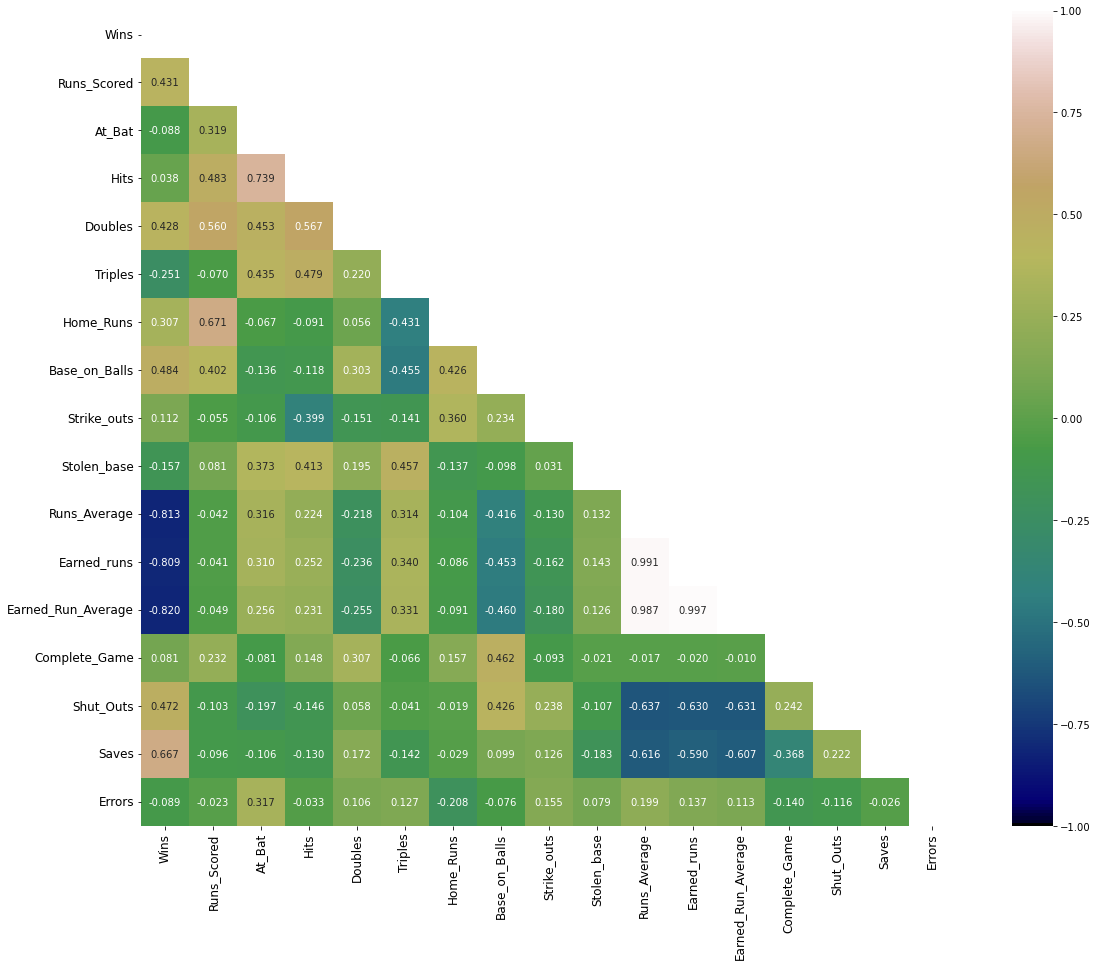

In [94]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,square=True, fmt='0.3f', annot_kws={'size':10},  cmap='gist_earth',mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

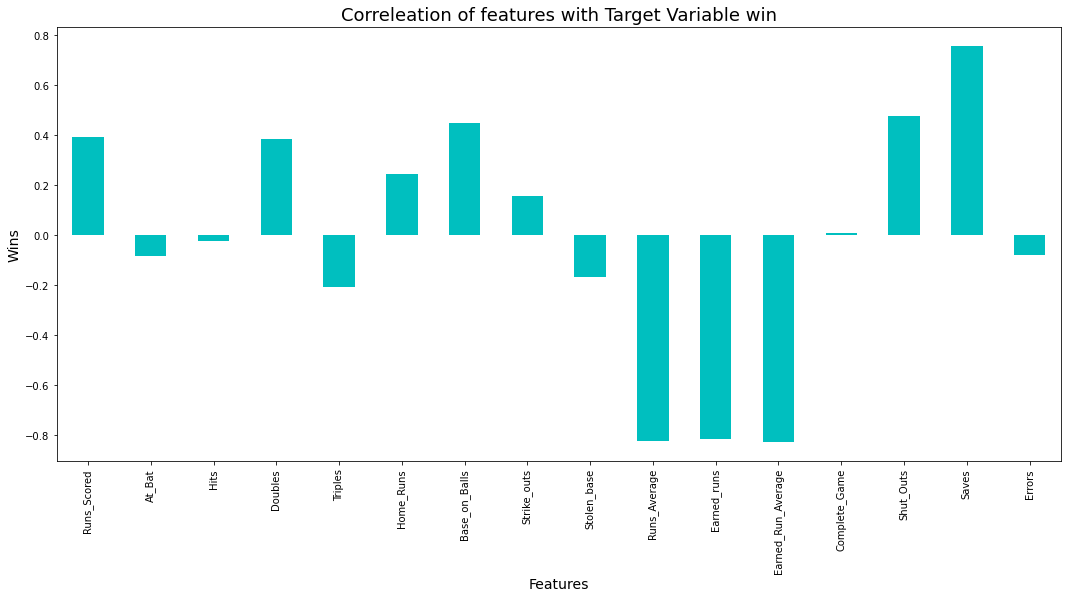

In [95]:
plt.figure(figsize=(18,8))
df1.corr()['Wins'].drop(['Wins']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Wins',fontsize=14)
plt.title('Correleation of features with Target Variable win',fontsize=18)
plt.show()

###### Comment : 
- **Saves,ERA,RA,EA are highly correlated with target variable.***
- **Hits,At Bat,Complete Game and Errors are very poorly correlated variable.**
- **There is visible multi-collinearity between the feature columns i.e Earned Runs, Earned Runs Average and Run Average which needs to be checked.**

### Checking Multicollinearity between features using variance_inflation_factor

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df1.values,i)for i in range(df1.shape[1])]
vif['Features']=df1.columns
vif

,VIF,Features
0,1241.003534,Wins
1,3248.685492,Runs_Scored
2,67999.633336,At_Bat
3,61783.303243,Hits
4,1059.348657,Doubles
5,33.888446,Triples
6,249.058062,Home_Runs
7,282.902409,Base_on_Balls
8,414.389674,Strike_outs
9,25.992021,Stolen_base


###### Comment : It is natural to have such high multicollinearity due to following reason-
- **Saves,ERA,RA,EA are highly correlated with target variable.**
- **Hits,At Bat,Complete Game and Errors are very poorly correlated variable.**
- **Most important reason is data is not scale .**

###### Strategy to remove multicollinearity:
1. **Removing some highly correlated features.but this will not work here as most of input features are correlated with each other either moderated or poorly.**
2. **Standard scaling and then apply PCA** (*we will use this step*)

### Standard Scaling

In [100]:
X=df1.drop(columns=['Wins'])
Y=df1['Wins']

In [102]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

### PCA

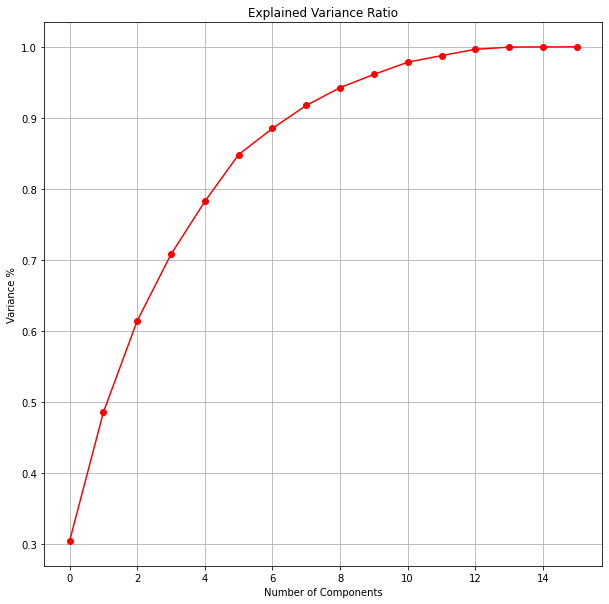

In [103]:
from sklearn.decomposition import PCA
pca = PCA()
#plot graph to find principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance Ratio')
plt.grid()

###### Comment :  As per the graph , we can observe that 7 principal components attribute for 95% of variation in the data.We shall pick the first 7 components for our prediction. 

In [104]:
pca_new = PCA(n_components=7)
x_new = pca_new.fit_transform(X_scale)

In [106]:
principle_x=pd.DataFrame(x_new,columns=np.arange(7))

### Checking Multicollinearity after applying PCA

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(principle_x.values,i)for i in range(principle_x.shape[1])]
vif['Features']=principle_x.columns
vif

,VIF,Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6


###### We can observe that Multicollinearity issue is clear .

## Machine Learning Model Building

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (20, 7)
Training target vector size: (20,)
Test feature matrix size: (9, 7)
Test target vector size: (9,)


### Finding Best Random state

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.9179738330851042 on Random_state 217


### Linear Regression : Base Model

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=217, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [84.58605088 96.26198656 82.50274504 63.77883574 88.03714446 70.54986049
 82.43803368 72.96772225]


Actual Wins:
 2     81
15    98
26    79
23    63
5     87
4     74
6     81
17    68
Name: Wins, dtype: int64


### Linear Regression Evaluation Matrix

In [114]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 2.5623356267648205
Mean squared error : 8.560199512884212
Root Mean Squared Error: 2.925781863516864


 R2 Score :
0.9179738330851042


### Cross Validation

In [122]:
from sklearn.model_selection import cross_val_score
# Cross Validation
score = cross_val_score(lin_reg, principle_x, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.3354655028709037


 True Values Vs Predicted Value plot :


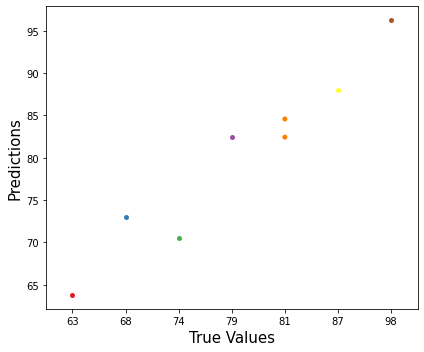

In [118]:
plt.figure(figsize=(6,5))
y_pred=lin_reg.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Finding best n_neighbors for KNN Regressor

In [119]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8.246211251235321
RMSE value for k=  2 is: 6.267475568360838
RMSE value for k=  3 is: 6.1553951042064625
RMSE value for k=  4 is: 5.050525962709231
RMSE value for k=  5 is: 5.566866263886713
RMSE value for k=  6 is: 5.9956581512513445
RMSE value for k=  7 is: 5.569367750728727
RMSE value for k=  8 is: 5.896900668995536
RMSE value for k=  9 is: 6.370868305259728
RMSE value for k=  10 is: 6.42008566921034


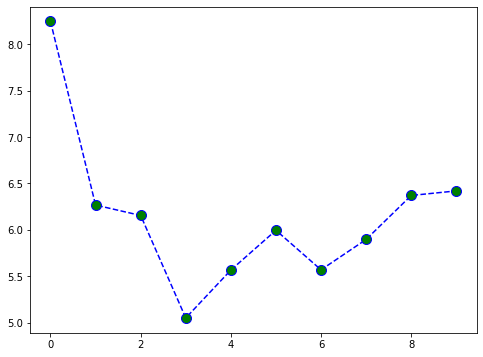

In [120]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))plt.plot(range(10), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

###### Comment : At k = 4 we get the minimum RMSE value which approximately 5.050525962709231, and shoots up on further increasing the k value.We can safely say that k=4 will give us the best result in this case.

### Applying other Regression Model, Evaluation & Crossvalidation

In [123]:
rf = RandomForestRegressor(n_estimators = 250 ,max_depth=6)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='mse')
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor( max_depth=6,learning_rate=0.1)
knn=KNeighborsRegressor(n_neighbors=4,algorithm='kd_tree')
ls= Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
rd=Ridge(alpha=1e-2, normalize=True)
xgb=XGBRegressor()
model = [rf,ls,rd,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    
    # Cross Validation
    score = cross_val_score(m, principle_x, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



 Error of  RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error : 4.772125000000003
Mean squared error : 38.33802897778911
Root Mean Squared Error: 6.191771069555875


 R2 Score :
0.6326345478996103


Cross Validation Score : RandomForestRegressor(max_depth=6, n_estimators=250) :

Mean CV Score : 0.2724312704081301


 Error of  Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :
Mean absolute error : 2.516268968257969
Mean squared error : 8.448615218482999
Root Mean Squared Error: 2.906650171328328


 R2 Score :
0.9190430642337308


Cross Validation Score : Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :

Mean CV Score : 0.671087354683993


 Error of  Ridge(alpha=0.01, normalize=True) :
Mean absolute error : 2.571235055189419
Mean squared error : 8.55430540440068
Root Mean Squared Error: 2.924774419404115


 R2 Score :
0.9180303120404786


Cross Validation Score : Ridge(alpha=0.01, normalize=True) :

Mean CV Score : 0.6706084407569657


 Error of  SVR(

#### *We can observe that Lasso Regression gives maximum R2 score of 91.90%. So we will apply Hyperparameter tuning on Lasso Regression.*



 True Values Vs Predicted Value plot RandomForestRegressor(max_depth=6, n_estimators=250) :


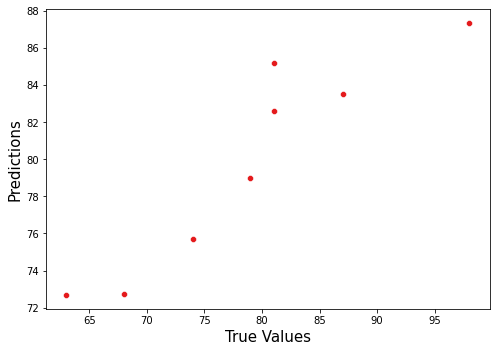





 True Values Vs Predicted Value plot Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :


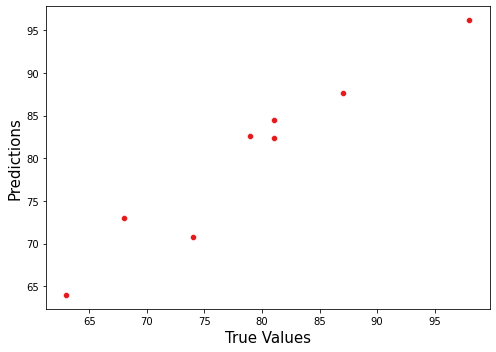





 True Values Vs Predicted Value plot Ridge(alpha=0.01, normalize=True) :


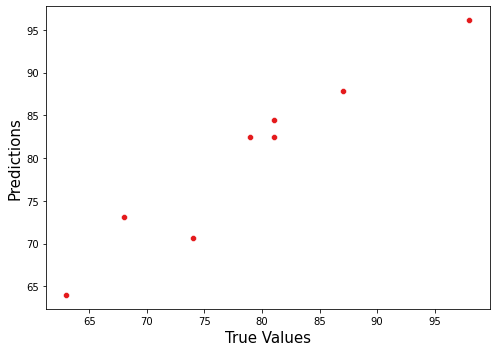





 True Values Vs Predicted Value plot SVR(epsilon=0.2, gamma='auto', kernel='poly') :


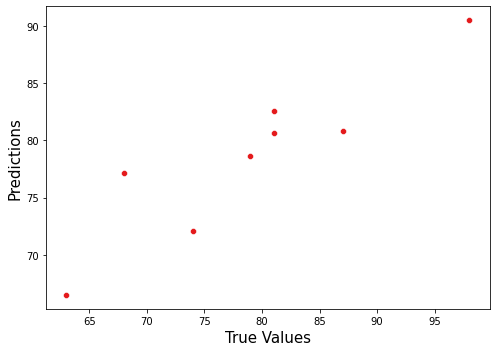





 True Values Vs Predicted Value plot DecisionTreeRegressor() :


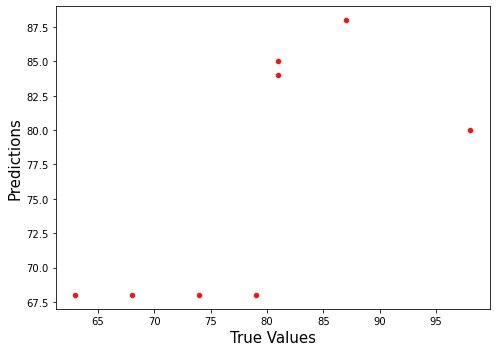





 True Values Vs Predicted Value plot AdaBoostRegressor(learning_rate=0.1) :


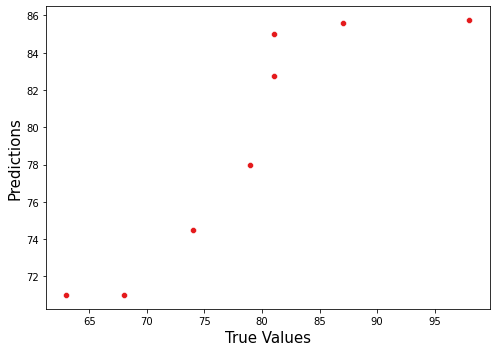





 True Values Vs Predicted Value plot GradientBoostingRegressor(max_depth=6) :


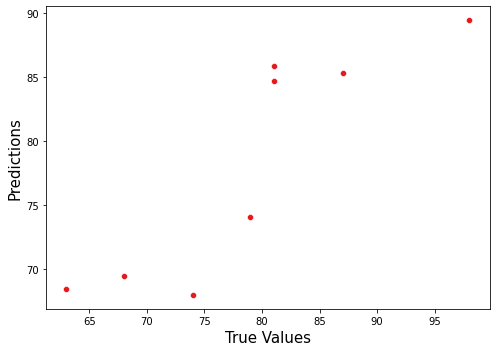





 True Values Vs Predicted Value plot KNeighborsRegressor(algorithm='kd_tree', n_neighbors=4) :


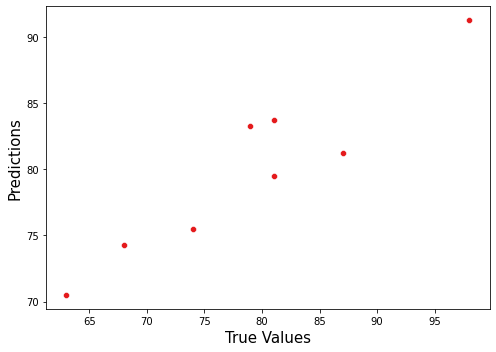





 True Values Vs Predicted Value plot XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) :


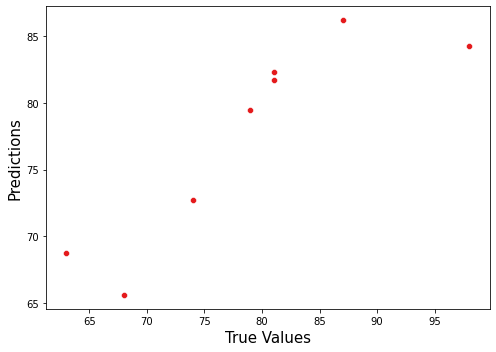

In [124]:
model = [rf,ls,rd,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    plt.figure(figsize=(7,5))
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+' True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    sns.scatterplot(Y_test.round(2), y_pred)
    plt.xlabel('True Values' , fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    print('\n')
    print('===================================================================================================')

## Hyper Parameter Tuning : GridSearchCV

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
_parameter = {'alpha':np.array([1,0.5,0.1,0.01,0.001,0.0001]),
             'fit_intercept': [True,False],'normalize':[True,False],
             'max_iter':[250,500,1000,1500],'random_state':np.arange(100),
             'selection':["cyclic","random"]}

In [127]:
GCV = GridSearchCV(Lasso(),_parameter,cv=5,n_jobs = -1,verbose = 3)

In [130]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 19200 candidates, totalling 96000 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.e+00, 5.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
                         'fit_intercept': [True, False],
                         'max_iter': [250, 500, 1000, 1500],
                         'normalize': [True, False],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=3)

## Final Model

In [132]:
Final_mod = Lasso(alpha = 0.5, fit_intercept= True, normalize = False,
                                           max_iter = 250, random_state = 32,selection ='random')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 2.6888055239454136
Mean squared error : 9.617386970550859
Root Mean Squared Error: 3.101191217992025


 R2 Score of Final Model :
0.9078435744699423




 True Values Vs Predicted Value plot :


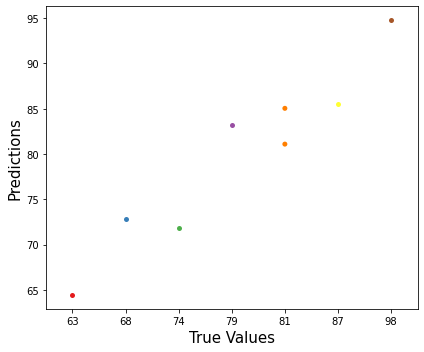

In [133]:
plt.figure(figsize=(6,5))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

### Saving model

In [134]:
import joblib
joblib.dump(Final_mod,'Baseballn_Final.pkl')

['Baseballn_Final.pkl']

***